In [1]:
#lemma 
#when we have weaker model and we combine them we get a better model


1. average/bagging/bootstrap aggregation- the driving priniciple is to build several estimators independantly and then to average or vote their predictors.on average the combined estimator is usually better than any of the single base estimator because its variance is reduced
2. import sklearn.bagging classifier, baggingregression (old one)(new and better available)
3. the random forest(classifier, regressor) purely uses decision trees as its base model
4. sample data is expected to have roughly 63.2 % i.e (1-1/e)

In [2]:
import pandas as pd

In [14]:
credit=pd.read_csv('C://Users//vansh//Downloads//credit (1).csv')

In [119]:
credit.default.value_counts()

no     700
yes    300
Name: default, dtype: int64

In [16]:
credit1=credit.drop('default',axis=1)

In [17]:
credit_dummy=pd.get_dummies(credit1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()

In [20]:
credit_scaled=pd.DataFrame(sc.fit_transform(credit_dummy),columns=credit_dummy.columns)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(credit_scaled,credit.default,test_size=0.30,random_state=123)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier(max_depth=5)

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
predict=dt.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,predict)

0.6966666666666667

In [32]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()

In [33]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [43]:
predict=bc.predict(x_test)
predict

array(['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 

In [36]:
accuracy_score(y_test,predict)

0.72

In [67]:
for i in bc.estimators_samples_:
    print(len(i))

700
700
700
700
700
700
700
700
700
700


In [44]:
bc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2067647066, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=664417682, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fr

In [45]:
bc.oob_score

False

In [57]:
#out of bag score is a method of measuring the prediction error of random forest, bagging, utilizing bootstrap
#aggregation to sub-sample data sample used for training
import numpy as np

In [60]:
abc=np.array(ab)

In [62]:
len(abc)

10

In [70]:
len(bc.estimators_samples_[1])

700

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150)

In [100]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
pred=rf.predict(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [102]:
accuracy_score(y_test,pred)

0.75

In [76]:
rf.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
rf.classes_

array(['no', 'yes'], dtype=object)

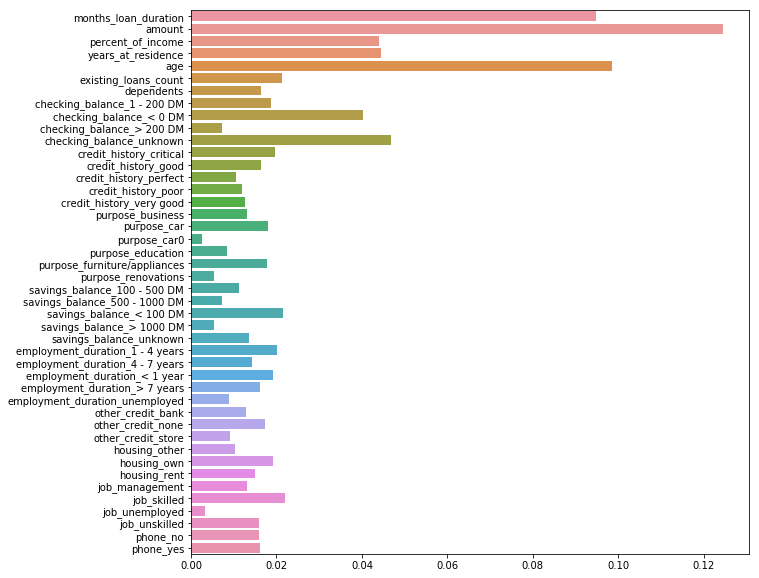

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10,10])
sns.barplot(rf.feature_importances_,credit_dummy.columns)

In [79]:
rf.oob_score

False

In [80]:
credit_dummy.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [98]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=148683720, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2123139758, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [55]:
import pandas as pd
test=pd.read_csv('C://Users//vansh//Downloads//test (3).csv')

In [56]:
train=pd.read_csv('C://Users//vansh//Downloads//train (3).csv')

In [57]:
macro=pd.read_excel('C://Users//vansh//Downloads//macro_economic.xlsx')

In [58]:
event=pd.read_csv('C://Users//vansh//Downloads//events_holidays.csv')

In [59]:
event.head()

,Year,MonthDate,Event,DayCategory
0,2009,Jan-01,New Year's Day,Federal Holiday
1,2009,Jan-19,Martin Luther King Jr. Day,Federal Holiday
2,2009,Feb-14,Valentine's Day,Event
3,2009,Feb-16,Presidents' Day,Federal Holiday
4,2009,Apr-12,Easter Sunday,Event


In [60]:
event['Month']=(event.MonthDate).str.split('-',expand=True)[0]

In [61]:
event.head()

,Year,MonthDate,Event,DayCategory,Month
0,2009,Jan-01,New Year's Day,Federal Holiday,Jan
1,2009,Jan-19,Martin Luther King Jr. Day,Federal Holiday,Jan
2,2009,Feb-14,Valentine's Day,Event,Feb
3,2009,Feb-16,Presidents' Day,Federal Holiday,Feb
4,2009,Apr-12,Easter Sunday,Event,Apr


In [62]:
event.drop('MonthDate',axis=1,inplace=True)

In [63]:
event.head()

,Year,Event,DayCategory,Month
0,2009,New Year's Day,Federal Holiday,Jan
1,2009,Martin Luther King Jr. Day,Federal Holiday,Jan
2,2009,Valentine's Day,Event,Feb
3,2009,Presidents' Day,Federal Holiday,Feb
4,2009,Easter Sunday,Event,Apr


In [64]:
event['Year-Month']=event['Year'].map(str)+ ' - '+ event['Month']

In [65]:
event.head()

,Year,Event,DayCategory,Month,Year-Month
0,2009,New Year's Day,Federal Holiday,Jan,2009 - Jan
1,2009,Martin Luther King Jr. Day,Federal Holiday,Jan,2009 - Jan
2,2009,Valentine's Day,Event,Feb,2009 - Feb
3,2009,Presidents' Day,Federal Holiday,Feb,2009 - Feb
4,2009,Easter Sunday,Event,Apr,2009 - Apr


In [66]:
event1=event.drop(['Year','Month'],axis=1)

In [67]:
event1.head()

,Event,DayCategory,Year-Month
0,New Year's Day,Federal Holiday,2009 - Jan
1,Martin Luther King Jr. Day,Federal Holiday,2009 - Jan
2,Valentine's Day,Event,2009 - Feb
3,Presidents' Day,Federal Holiday,2009 - Feb
4,Easter Sunday,Event,2009 - Apr


In [68]:
vent=pd.DataFrame(event['Year-Month'].value_counts()).reset_index()

In [69]:
vent.head()

,index,Year-Month
0,2010 - Dec,5
1,2016 - Dec,4
2,2011 - Dec,4
3,2015 - Dec,4
4,2012 - Dec,3


In [70]:
vent=vent.rename({"index":'Year-Month','Year-Month':'Days'},axis=1)

In [71]:
train.Month.replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',
                                                                  'Nov','Dec'],inplace=True)

In [72]:
test.Month.replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12],value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct',
                                                                  'Nov','Dec'],inplace=True)

In [73]:
train['Year-Month']=train['Year'].map(str)+' - ' + train['Month']

In [74]:
test['Year-Month']=test['Year'].map(str)+' - ' + test['Month']

In [75]:
train.drop(['Year','Month'],axis=1,inplace=True)
test.drop(['Year','Month'],axis=1,inplace=True)

In [76]:
train=pd.merge(macro,train)
test=pd.merge(macro,test)

In [129]:
newtrain=pd.merge(train,vent,how='left')

In [130]:
newtest=pd.merge(test,vent,how='left')

In [131]:
newtrain.columns

Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'ProductCategory', 'Sales(In ThousandDollars)', 'Days'],
      dtype='object')

In [132]:
newtrain.corr()


,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Sales(In ThousandDollars),Days
Monthly Nominal GDP Index (inMillion$),1.000000,0.996804,0.975682,-0.925558,-0.834934,-0.745742,0.981173,-0.052016,-0.280840,0.313088,0.125845,0.015119,0.128631,0.153626,-0.405594,0.225384,-0.001489
Monthly Real GDP Index (inMillion$),0.996804,1.000000,0.964330,-0.907454,-0.805455,-0.731316,0.973840,-0.035642,-0.272941,0.320355,0.154701,0.003623,0.153697,0.146046,-0.382533,0.227035,0.011879
CPI,0.975682,0.964330,1.000000,-0.869079,-0.854688,-0.758593,0.964981,-0.004037,-0.322917,0.392013,0.126428,0.038918,0.132092,0.071688,-0.398986,0.209394,-0.070497
unemployment rate,-0.925558,-0.907454,-0.869079,1.000000,0.862677,0.700418,-0.911239,0.222489,0.279361,-0.148274,0.047932,-0.020579,0.033997,-0.323157,0.496563,-0.201628,-0.002739
CommercialBankInterestRateonCreditCardPlans,-0.834934,-0.805455,-0.854688,0.862677,1.000000,0.629292,-0.821359,0.205823,0.358813,-0.446080,-0.046135,-0.021748,-0.043434,-0.231278,0.470729,-0.166365,-0.000487
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",-0.745742,-0.731316,-0.758593,0.700418,0.629292,1.000000,-0.762773,0.151066,0.066662,-0.128818,0.139309,-0.172168,0.069180,0.060007,0.356229,-0.150551,-0.012760
Earnings or wages in dollars per hour,0.981173,0.973840,0.964981,-0.911239,-0.821359,-0.762773,1.000000,-0.026556,-0.222460,0.293720,0.078657,0.015154,0.081769,0.116824,-0.407699,0.212916,0.037270
Cotton Monthly Price - US cents per Pound(lbs),-0.052016,-0.035642,-0.004037,0.222489,0.205823,0.151066,-0.026556,1.000000,0.136389,0.239869,0.533370,0.177688,0.541117,0.096928,0.692062,0.009490,0.051248
Change(in%),-0.280840,-0.272941,-0.322917,0.279361,0.358813,0.066662,-0.222460,0.136389,1.000000,-0.287947,0.001225,0.154933,0.034779,-0.291507,0.330181,-0.054545,0.093130
Average upland planted(million acres),0.313088,0.320355,0.392013,-0.148274,-0.446080,-0.128818,0.293720,0.239869,-0.287947,1.000000,0.589487,-0.104259,0.516568,0.047850,0.012749,0.073188,0.069210


In [133]:
newtrain.drop(['Year-Month','AdvertisingExpenses (in Thousand Dollars)','Days'],axis=1,inplace=True)

In [134]:
newtest.drop(['Year-Month','Sales(In ThousandDollars)','AdvertisingExpenses (in Thousand Dollars)','Days'],axis=1,inplace=True)

In [135]:
newtrain.drop('PartyInPower',axis=1,inplace=True)

In [136]:
newtest.drop('PartyInPower',axis=1,inplace=True)

In [137]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 17 columns):
Monthly Nominal GDP Index (inMillion$)                               216 non-null float64
Monthly Real GDP Index (inMillion$)                                  216 non-null float64
CPI                                                                  216 non-null float64
unemployment rate                                                    216 non-null float64
CommercialBankInterestRateonCreditCardPlans                          216 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    216 non-null float64
Earnings or wages  in dollars per hour                               216 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       216 non-null float64
Change(in%)                                                          216 non-null float64
Average upland planted(million acres)                                216 non-null flo

In [138]:
newtrain.Days.fillna(0,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Days'

In [139]:
newtest.Days.fillna(0,inplace=True)
newtrain.info()
newtrain['Sales(In ThousandDollars)'].mean()

AttributeError: 'DataFrame' object has no attribute 'Days'

In [140]:
newtrain['Sales(In ThousandDollars)'].fillna(1702,inplace=True)

In [141]:
newtrain

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory,Sales(In ThousandDollars)
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,WomenClothing,1755.0
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,MenClothing,524.0
2,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,OtherClothing,936.0
3,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,WomenClothing,1729.0
4,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,MenClothing,496.0
5,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,OtherClothing,859.0
6,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,WomenClothing,2256.0
7,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,MenClothing,542.0
8,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,OtherClothing,921.0
9,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225,WomenClothing,2662.0


In [142]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [143]:
train_dummies=pd.get_dummies(newtrain.drop('Sales(In ThousandDollars)',axis=1))

In [144]:
test_dummies=pd.get_dummies(newtest)

In [145]:
train_dummies.columns

Index(['Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'ProductCategory_MenClothing', 'ProductCategory_OtherClothing',
       'ProductCategory_WomenClothing'],
      dtype='object')

In [146]:
train_scaled=pd.DataFrame(sc.fit_transform(train_dummies),columns=train_dummies.columns)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [147]:
test_scaled=pd.DataFrame(sc.fit_transform(test_dummies),columns=test_dummies.columns)

C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt=DecisionTreeRegressor(max_depth=7)

In [174]:
rf=RandomForestRegressor(n_estimators=10,max_depth=5)

In [175]:
rf.fit(train_scaled,newtrain['Sales(In ThousandDollars)'])
dt.fit(train_scaled,newtrain['Sales(In ThousandDollars)'])

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [176]:
prediction=rf.predict(test_scaled)
prediction1=dt.predict(test_scaled)

In [177]:
solution=pd.DataFrame({'S.No.':range(1,37),'Sales':prediction})

In [178]:
solution.to_csv('Solution_random2.csv',index=False)

In [179]:
prediction

array([2392.29368932,  924.5075268 , 1055.5084904 , 2823.09954807,
        858.34582753,  977.05941635, 2638.82255391,  829.76730723,
        975.80026304, 3260.36329705,  828.25758583, 1000.63265531,
       3210.70730062,  794.86561765, 1149.83439644, 3133.87543965,
        664.28551969, 1195.90210589, 3094.19625889,  664.34169433,
       1182.21566617, 3259.64555313,  743.83256653, 1305.85052644,
       4048.75456981,  724.46380459, 1249.02601012, 3566.22961966,
        691.58221037, 1232.55663712, 3615.55069368,  706.29627929,
       1240.60249793, 4283.30802436,  823.68279128, 1518.43284465])

In [156]:
train

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory,Sales(In ThousandDollars)
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,WomenClothing,1755.0
1,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,MenClothing,524.0
2,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,OtherClothing,936.0
3,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,WomenClothing,1729.0
4,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,MenClothing,496.0
5,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,OtherClothing,859.0
6,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,WomenClothing,2256.0
7,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,MenClothing,542.0
8,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,OtherClothing,921.0
9,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225,WomenClothing,2662.0


In [157]:
import xgboost as xgb
import numpy as np

In [158]:
sb=xgb.XGBRFRegressor(max_depth=5)

In [159]:
sb.fit(np.array(train_scaled),newtrain['Sales(In ThousandDollars)'])

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:41:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.8, verbosity=1)

In [160]:
pred=sb.predict(np.array(test_scaled))

In [161]:
solution=pd.DataFrame({'S.No.':range(1,37),'Sales':pred})

In [162]:
solution.to_csv('Solution_random2.csv',index=False)
from sklearn.model_selection import GridSearchCV

In [163]:
sb=xgb.XGBRFRegressor()
parameters={'n_estimators':[10,50,100],'max_depth':[4,5,6,7]}
clf=GridSearchCV(sb,parameters,cv=10)
clf.fit(np.array(train_scaled),newtrain['Sales(In ThousandDollars)'])

[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:40] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:41] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaco

[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:42] WARNI

C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vansh\Anaconda4\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\vansh\Anaconda4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and w

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [164]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [165]:
clf.best_score_

0.8235686141439835

In [166]:
pred=clf.predict(np.array(test_scaled))

In [167]:
pred

array([2501.7468 ,  626.3118 , 1042.211  , 2501.7468 ,  687.0745 ,
       1042.211  , 2501.7468 ,  784.52246, 1042.211  , 3287.1833 ,
        806.37335, 1042.211  , 3399.7224 ,  753.10077, 1169.658  ,
       3395.3916 ,  744.10486, 1169.658  , 3286.5513 ,  744.10486,
       1169.658  , 3399.7224 ,  744.10486, 1169.658  , 3508.5627 ,
        744.10486, 1169.658  , 3508.5627 ,  744.10486, 1169.658  ,
       3508.5627 ,  744.10486, 1169.658  , 3396.0237 ,  744.10486,
       1169.658  ], dtype=float32)

In [128]:
solution=pd.DataFrame({'S.No.':range(1,37),'Sales':pred})
solution.to_csv('Solution_random2.csv',index=False)

In [194]:
weather=pd.read_excel('C://Users//vansh//Downloads//WeatherData.xlsx',sheet_name=[0,1,2,3,4,5,6,7])

In [195]:
frames=[weather[0],weather[1],weather[2],weather[3],weather[4],weather[5],weather[6],weather[7]]

In [196]:
result=pd.concat(frames)

In [197]:
result.shape

(2923, 23)

In [199]:
result.Year.value_counts()

2012.0    366
2016.0    366
2015.0    365
2014.0    365
2013.0    365
2011.0    365
2010.0    365
2009.0    365
Name: Year, dtype: int64

In [200]:
result.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009.0,Jan,1.0,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009.0,Jan,2.0,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009.0,Jan,3.0,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009.0,Jan,4.0,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009.0,Jan,5.0,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [201]:
result.WeatherEvent.fillna('Clear',inplace=True)

In [202]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 365
Data columns (total 23 columns):
Year                           2922 non-null float64
Month                          2922 non-null object
Day                            2922 non-null float64
Temp high (°C)                 2923 non-null object
Temp avg (°C)                  2923 non-null object
Temp low (°C)                  2923 non-null object
Dew Point high (°C)            2923 non-null object
Dew Point avg (°C)             2923 non-null object
Dew Point low (°C)             2923 non-null object
Humidity (%) high              2923 non-null object
Humidity (%) avg               2923 non-null object
Humidity (%) low               2923 non-null object
Sea Level Press. (hPa) high    2923 non-null object
Sea Level Press. (hPa) avg     2923 non-null object
Sea Level Press. (hPa) low     2923 non-null object
Visibility (km) high           2923 non-null object
Visibility (km) avg            2923 non-null object
Visibili

In [206]:
result.WeatherEvent.str.extract

TypeError: split() takes from 1 to 4 positional arguments but 5 were given

In [ ]:
event['Month']=(event.MonthDate).str.split('-',expand=True)[0]